In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('F:/Stroke Prediction/healthcare-dataset.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.shape

(5110, 12)

Splitting the data into x and y

In [6]:
x = df.drop(['id','stroke'],axis = 1)

In [7]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked


In [8]:
y = df.stroke.values

In [9]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

Seeing How many sub-types the string columns have in them.

In [10]:
#this column will need one hot encoding because it has more than 2 sub-types in it
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [12]:
#this column will require one_hot_encoding as it has too many sub-types that will need conversion.
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [13]:
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [14]:
#This column will need one hot encoding as well
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

Data Conversion

In [15]:
x['ever_married'] = [1 if each == 'Yes' else 0 for each in x['ever_married']]
x['Residence_type'] = [1 if each == 'Urban' else 0 for each in x['Residence_type']]

In [16]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked
1,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,1,Private,1,83.75,NaN,never smoked
5106,Female,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked
5107,Female,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked
5108,Male,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked


Data Trandformation / Preparation - Applying OneHotEncoding to the columns gender, work_type and smoking_status (bcoz these columns has more than 2 sub categories)

In [17]:
# Checking how many unique categories gender column has.
x['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
#Creating an object for onehotencoder
ohe = OneHotEncoder()

In [20]:
#Converting the gender into 3 columns and tranforming the data + storing it as an array
ohe.fit_transform(x[['gender']]).toarray()

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [21]:
#storing this converted array into a variable 
feature_array = ohe.fit_transform(x[['gender']]).toarray()

In [22]:
#Extracting the labels of these three columns and storing it in another variable
ohe.categories_

[array(['Female', 'Male', 'Other'], dtype=object)]

In [23]:
feature_label = ohe.categories_

Now the converted data and the labels are in array format we will now 
- Convert it into a dataframe
- Concatinating this data frame into the previous one

In [24]:
pd.DataFrame(feature_array, columns = feature_label)

,Female,Male,Other
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
5105,1.0,0.0,0.0
5106,1.0,0.0,0.0
5107,1.0,0.0,0.0
5108,0.0,1.0,0.0


In [25]:
#Storing the dataframe with name
feature1 = pd.DataFrame(feature_array, columns = feature_label)

Repeating the same steps of OneHotEncoding for columns work_type and smoking_status

In [26]:
x['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [27]:
ohe.fit_transform(x[['smoking_status']]).toarray()

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [28]:
feature_array1 = ohe.fit_transform(x[['smoking_status']]).toarray()

In [29]:
ohe.categories_

[array(['Unknown', 'formerly smoked', 'never smoked', 'smokes'],
       dtype=object)]

In [30]:
feature_label1 = ohe.categories_

In [31]:
#combining the column values and the column names and creating a dataframe
feature2 = pd.DataFrame(feature_array1, columns = feature_label1)

In [32]:
feature2

,Unknown,formerly smoked,never smoked,smokes
0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0
...,...,...,...,...
5105,0.0,0.0,1.0,0.0
5106,0.0,0.0,1.0,0.0
5107,0.0,0.0,1.0,0.0
5108,0.0,1.0,0.0,0.0


In [33]:
x['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [34]:
feature_array2 = ohe.fit_transform(x[['work_type']]).toarray()

In [35]:
feature_array2

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [36]:
feature_label2 = ohe.categories_

In [37]:
#combining values and column names+converting them to a dataframe
feature3 = pd.DataFrame(feature_array2, columns = feature_label2)

In [38]:
feature3

,Govt_job,Never_worked,Private,Self-employed,children
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
5105,0.0,0.0,1.0,0.0,0.0
5106,0.0,0.0,0.0,1.0,0.0
5107,0.0,0.0,0.0,1.0,0.0
5108,0.0,0.0,1.0,0.0,0.0


Now dropping the original columns in which one hot encoding was done and concatenating the converted dataframes into a new one.

In [39]:
x = x.drop(['work_type','gender','smoking_status'], axis = 1)

In [40]:
x

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi
0,67.0,0,1,1,1,228.69,36.6
1,61.0,0,0,1,0,202.21,NaN
2,80.0,0,1,1,0,105.92,32.5
3,49.0,0,0,1,1,171.23,34.4
4,79.0,1,0,1,0,174.12,24.0
...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,NaN
5106,81.0,0,0,1,1,125.20,40.0
5107,35.0,0,0,1,0,82.99,30.6
5108,51.0,0,0,1,0,166.29,25.6


In [41]:
pd.concat([x,feature1,feature2,feature3], axis = 1)

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,"(Female,)","(Male,)","(Other,)","(Unknown,)","(formerly smoked,)","(never smoked,)","(smokes,)","(Govt_job,)","(Never_worked,)","(Private,)","(Self-employed,)","(children,)"
0,67.0,0,1,1,1,228.69,36.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,61.0,0,0,1,0,202.21,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0,1,1,0,105.92,32.5,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,49.0,0,0,1,1,171.23,34.4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,79.0,1,0,1,0,174.12,24.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5106,81.0,0,0,1,1,125.20,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5107,35.0,0,0,1,0,82.99,30.6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5108,51.0,0,0,1,0,166.29,25.6,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [42]:
new_df = pd.concat([x,feature1,feature2,feature3], axis = 1)

Checking correlation between the data

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

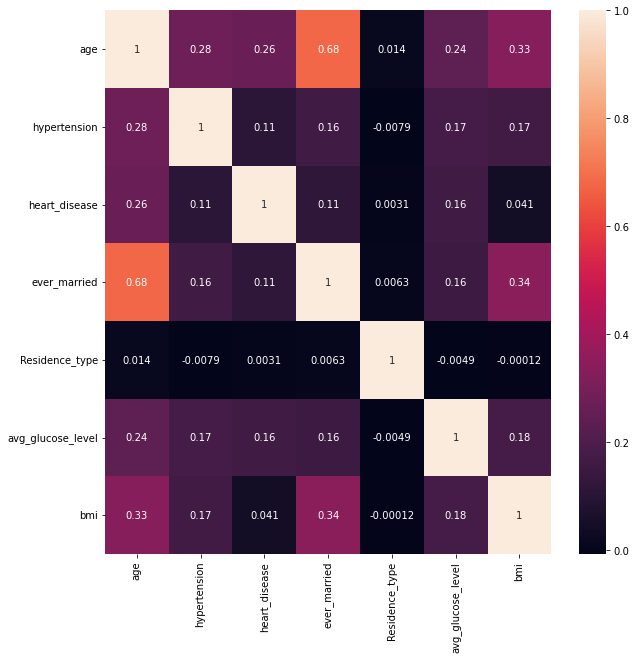

In [44]:
plt.figure(figsize = (10,10))
data = x.corr()
sns.heatmap(data, annot = True)

Filling missing values with the mean of the column in the dataframe

In [45]:
value = new_df['bmi'].mean()

In [46]:
new_df['bmi'].fillna(value = value, inplace = True)

In [47]:
new_df.dtypes

age                   float64
hypertension            int64
heart_disease           int64
ever_married            int64
Residence_type          int64
avg_glucose_level     float64
bmi                   float64
(Female,)             float64
(Male,)               float64
(Other,)              float64
(Unknown,)            float64
(formerly smoked,)    float64
(never smoked,)       float64
(smokes,)             float64
(Govt_job,)           float64
(Never_worked,)       float64
(Private,)            float64
(Self-employed,)      float64
(children,)           float64
dtype: object

In [48]:
new_df.isnull().sum()

age                   0
hypertension          0
heart_disease         0
ever_married          0
Residence_type        0
avg_glucose_level     0
bmi                   0
(Female,)             0
(Male,)               0
(Other,)              0
(Unknown,)            0
(formerly smoked,)    0
(never smoked,)       0
(smokes,)             0
(Govt_job,)           0
(Never_worked,)       0
(Private,)            0
(Self-employed,)      0
(children,)           0
dtype: int64

Building training and testing set

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.3, random_state = 42)

# Support Vector Classifier

In [51]:
from sklearn.svm import SVC

In [52]:
svc = SVC()

In [53]:
svc.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


SVC()

In [54]:
y_pred = svc.predict(x_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


Checking accuracy of the model

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
print('Accuracy = ', accuracy_score(y_pred,y_test)*100)

Accuracy =  94.19439008480104


# KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [59]:
knn.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier()

In [60]:
y_prediction = knn.predict(x_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [61]:
#Printing Accuracy
print('Accuracy = ',accuracy_score(y_prediction,y_test)*100)

Accuracy =  93.54207436399217


Confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
matrix = confusion_matrix(y_test, y_prediction)

<function matplotlib.pyplot.show(close=None, block=None)>

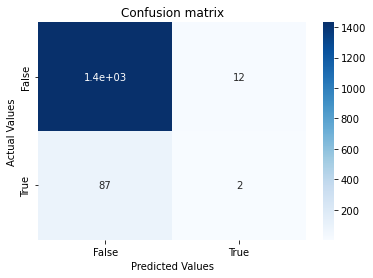

In [64]:
#Plotting confusion matrix with seaborn
mat = sns.heatmap(matrix, annot = True, cmap = 'Blues')

#labeling the matrix
mat.set_title('Confusion matrix')
mat.set_xlabel('Predicted Values')
mat.set_ylabel('Actual Values')

#Ticket labels in the matrix
mat.xaxis.set_ticklabels(['False','True'])
mat.yaxis.set_ticklabels(['False','True'])

plt.show

Out of both the classification algorithm SVC is more accurate.